# **Hyperparameter Tuning**
## **Strojenie hiperparametrów**

---

### **Overview / Przegląd**

Hyperparameter tuning is the process of finding the optimal configuration of hyperparameters for machine learning models. Unlike model parameters (learned from data), hyperparameters are set before training and control the learning process.

Strojenie hiperparametrów to proces znajdowania optymalnej konfiguracji hiperparametrów dla modeli uczenia maszynowego. W przeciwieństwie do parametrów modelu (uczonych z danych), hiperparametry są ustawiane przed treningiem i kontrolują proces uczenia.

### **Methods / Metody**

1. **Grid Search** - Exhaustive search over parameter grid / Wyczerpujące przeszukiwanie siatki parametrów
2. **Random Search** - Random sampling from parameter space / Losowe próbkowanie z przestrzeni parametrów  
3. **Bayesian Optimization** - Uses probabilistic model to guide search / Używa modelu probabilistycznego do kierowania przeszukiwaniem
4. **Halving Search** - Successively halves the number of candidates / Sukcesywnie zmniejsza o połowę liczbę kandydatów

### **Cross-Validation / Walidacja krzyżowa**
Essential for reliable hyperparameter evaluation to avoid overfitting to validation set.

Niezbędna dla wiarygodnej oceny hiperparametrów, aby uniknąć przeuczenia na zbiorze walidacyjnym.


In [1]:
# Import required libraries / Importowanie wymaganych bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine, load_digits
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV, 
                                   train_test_split, cross_val_score)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from scipy.stats import randint, uniform
import time
import warnings
warnings.filterwarnings('ignore')

# Set style for plots / Ustawienie stylu wykresów
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Libraries imported successfully / Biblioteki zaimportowane pomyślnie")


Libraries imported successfully / Biblioteki zaimportowane pomyślnie


Dataset shape / Kształt zbioru danych: (178, 13)
Number of classes / Liczba klas: 3
Training set size / Rozmiar zbioru treningowego: 142
Test set size / Rozmiar zbioru testowego: 36


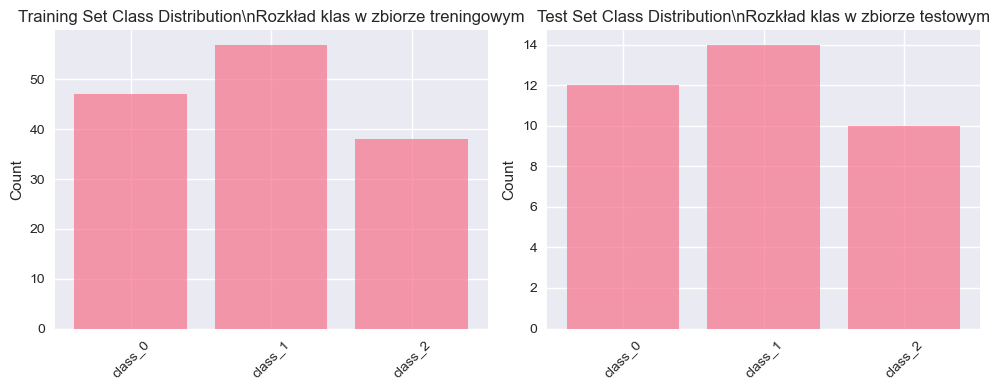

In [2]:
# Load and prepare dataset / Wczytanie i przygotowanie zbioru danych
wine = load_wine()
X, y = wine.data, wine.target

# Split the data / Podział danych
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Dataset shape / Kształt zbioru danych: {X.shape}")
print(f"Number of classes / Liczba klas: {len(wine.target_names)}")
print(f"Training set size / Rozmiar zbioru treningowego: {X_train.shape[0]}")
print(f"Test set size / Rozmiar zbioru testowego: {X_test.shape[0]}")

# Display class distribution / Wyświetlenie rozkładu klas
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(wine.target_names, counts, alpha=0.7)
plt.title('Training Set Class Distribution\\nRozkład klas w zbiorze treningowym')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
unique, counts = np.unique(y_test, return_counts=True)
plt.bar(wine.target_names, counts, alpha=0.7)
plt.title('Test Set Class Distribution\\nRozkład klas w zbiorze testowym')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [3]:
# 1. GRID SEARCH EXAMPLE / PRZYKŁAD GRID SEARCH
print("=== GRID SEARCH ===")

# Create pipeline with scaling and Random Forest / Tworzenie pipeline ze skalowaniem i Random Forest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

# Define parameter grid / Definicja siatki parametrów
param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [3, 5, 7, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search / Wykonanie Grid Search
start_time = time.time()
grid_search_rf = GridSearchCV(
    pipeline_rf, 
    param_grid_rf, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search_rf.fit(X_train, y_train)
grid_time = time.time() - start_time

print(f"\\nGrid Search completed in {grid_time:.2f} seconds")
print(f"Best parameters / Najlepsze parametry: {grid_search_rf.best_params_}")
print(f"Best CV score / Najlepszy wynik CV: {grid_search_rf.best_score_:.4f}")

# Test performance / Wydajność testowa
y_pred_grid = grid_search_rf.predict(X_test)
grid_test_accuracy = accuracy_score(y_test, y_pred_grid)
print(f"Test accuracy / Dokładność testowa: {grid_test_accuracy:.4f}")

# 2. RANDOM SEARCH EXAMPLE / PRZYKŁAD RANDOM SEARCH
print("\\n=== RANDOM SEARCH ===")

# Define parameter distributions / Definicja rozkładów parametrów
param_dist_rf = {
    'rf__n_estimators': randint(50, 300),
    'rf__max_depth': [3, 5, 7, 10, None],
    'rf__min_samples_split': randint(2, 15),
    'rf__min_samples_leaf': randint(1, 8)
}

# Perform Random Search / Wykonanie Random Search
start_time = time.time()
random_search_rf = RandomizedSearchCV(
    pipeline_rf,
    param_dist_rf,
    n_iter=50,  # Same number of evaluations as grid search
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)
random_search_rf.fit(X_train, y_train)
random_time = time.time() - start_time

print(f"\\nRandom Search completed in {random_time:.2f} seconds")
print(f"Best parameters / Najlepsze parametry: {random_search_rf.best_params_}")
print(f"Best CV score / Najlepszy wynik CV: {random_search_rf.best_score_:.4f}")

# Test performance / Wydajność testowa
y_pred_random = random_search_rf.predict(X_test)
random_test_accuracy = accuracy_score(y_test, y_pred_random)
print(f"Test accuracy / Dokładność testowa: {random_test_accuracy:.4f}")

# Compare methods / Porównanie metod
comparison_results = pd.DataFrame({
    'Method': ['Grid Search', 'Random Search'],
    'Time (seconds)': [grid_time, random_time],
    'Best CV Score': [grid_search_rf.best_score_, random_search_rf.best_score_],
    'Test Accuracy': [grid_test_accuracy, random_test_accuracy]
})

print("\\n=== COMPARISON / PORÓWNANIE ===")
print(comparison_results.to_string(index=False, float_format='%.4f'))


=== GRID SEARCH ===
Fitting 5 folds for each of 108 candidates, totalling 540 fits
\nGrid Search completed in 5.24 seconds
Best parameters / Najlepsze parametry: {'rf__max_depth': 5, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 50}
Best CV score / Najlepszy wynik CV: 0.9931
Test accuracy / Dokładność testowa: 1.0000
\n=== RANDOM SEARCH ===
Fitting 5 folds for each of 50 candidates, totalling 250 fits
\nRandom Search completed in 2.53 seconds
Best parameters / Najlepsze parametry: {'rf__max_depth': 10, 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 12, 'rf__n_estimators': 121}
Best CV score / Najlepszy wynik CV: 0.9862
Test accuracy / Dokładność testowa: 1.0000
\n=== COMPARISON / PORÓWNANIE ===
       Method  Time (seconds)  Best CV Score  Test Accuracy
  Grid Search          5.2372         0.9931         1.0000
Random Search          2.5262         0.9862         1.0000


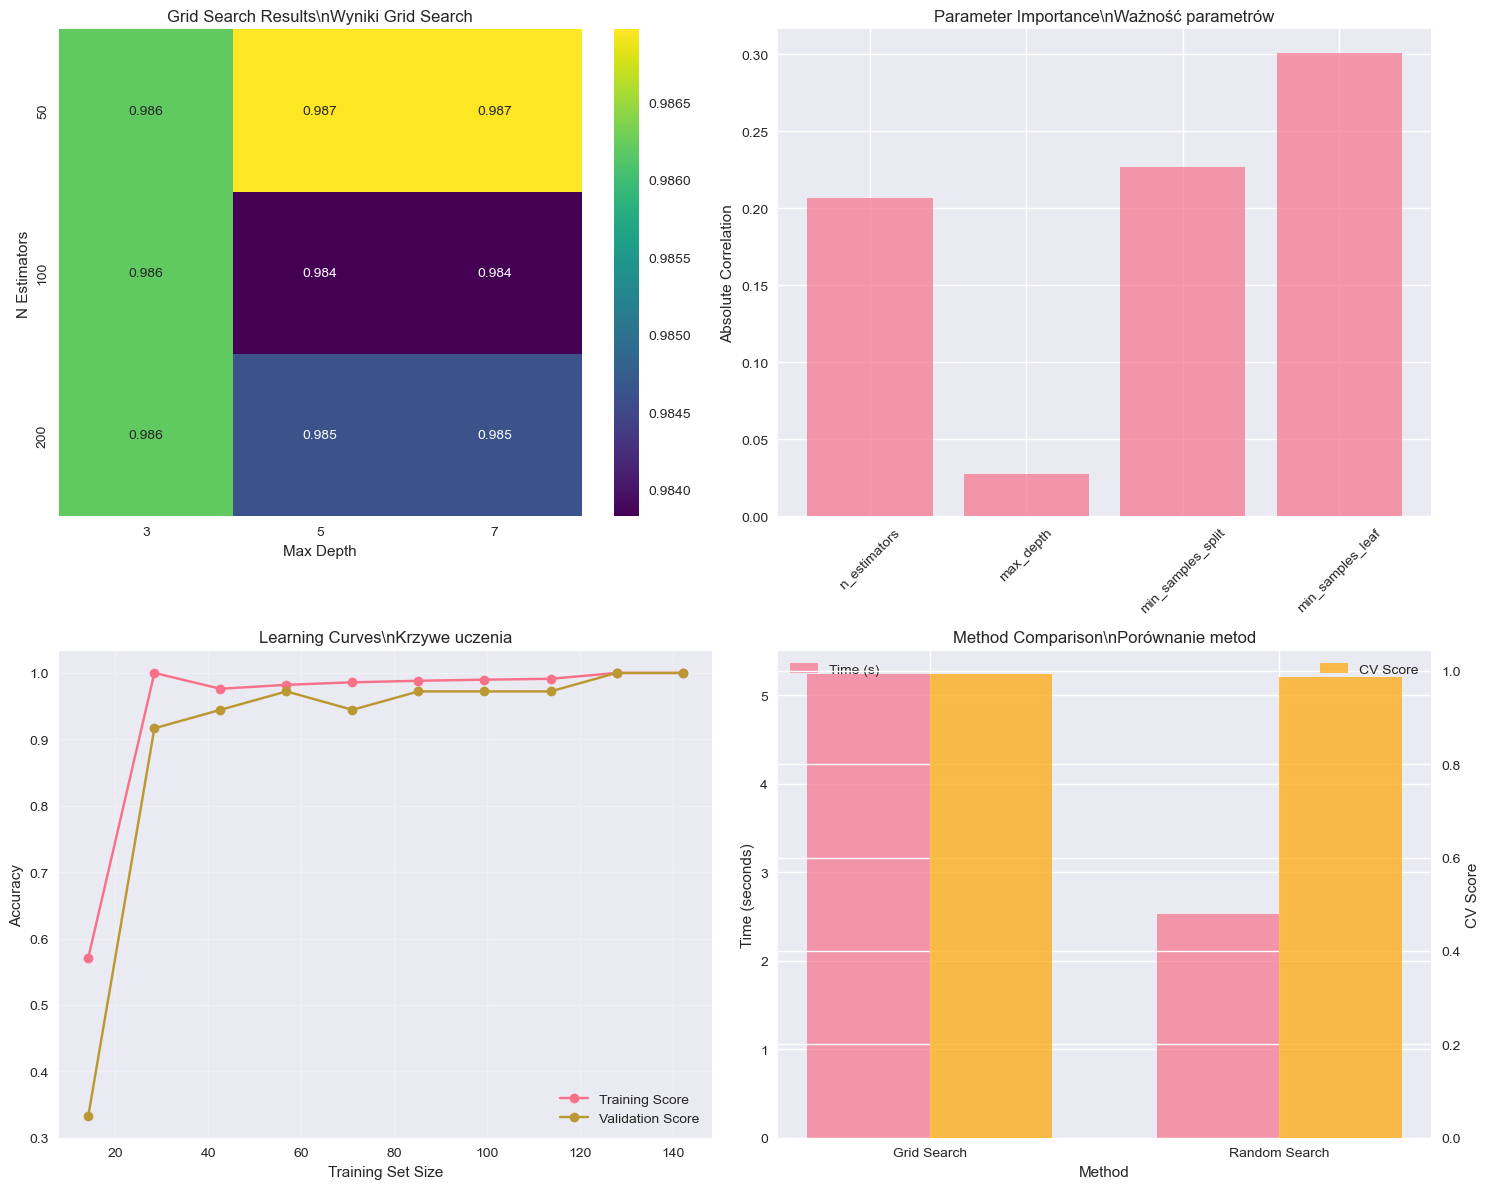

In [4]:
# Visualize hyperparameter tuning results / Wizualizacja wyników strojenia hiperparametrów
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Grid Search results heatmap / Mapa ciepła wyników Grid Search
grid_results = pd.DataFrame(grid_search_rf.cv_results_)

# Extract key parameters for visualization / Wyodrębnienie kluczowych parametrów do wizualizacji
param_n_estimators = grid_results['param_rf__n_estimators'].astype(int)
param_max_depth = grid_results['param_rf__max_depth'].fillna('None')
mean_scores = grid_results['mean_test_score']

# Create pivot table for heatmap / Tworzenie tabeli przestawnej dla mapy ciepła
pivot_table = grid_results.pivot_table(
    values='mean_test_score',
    index='param_rf__n_estimators',
    columns='param_rf__max_depth',
    aggfunc='mean'
)

sns.heatmap(pivot_table, annot=True, fmt='.3f', cmap='viridis', ax=axes[0, 0])
axes[0, 0].set_title('Grid Search Results\\nWyniki Grid Search')
axes[0, 0].set_xlabel('Max Depth')
axes[0, 0].set_ylabel('N Estimators')

# 2. Parameter importance plot / Wykres ważności parametrów
param_importance = {}
for param in ['rf__n_estimators', 'rf__max_depth', 'rf__min_samples_split', 'rf__min_samples_leaf']:
    param_values = grid_results[f'param_{param}']
    scores = grid_results['mean_test_score']
    
    # Calculate correlation between parameter values and scores
    if param == 'rf__max_depth':
        # Handle None values
        param_numeric = pd.to_numeric(param_values, errors='coerce').fillna(0)
    else:
        param_numeric = pd.to_numeric(param_values)
    
    correlation = np.corrcoef(param_numeric, scores)[0, 1]
    param_importance[param.replace('rf__', '')] = abs(correlation)

param_names = list(param_importance.keys())
param_values = list(param_importance.values())

axes[0, 1].bar(param_names, param_values, alpha=0.7)
axes[0, 1].set_title('Parameter Importance\\nWażność parametrów')
axes[0, 1].set_ylabel('Absolute Correlation')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Learning curves / Krzywe uczenia
train_sizes = np.linspace(0.1, 1.0, 10) * len(X_train)
train_scores_mean = []
val_scores_mean = []

best_model = grid_search_rf.best_estimator_

for train_size in train_sizes:
    train_size = int(train_size)
    X_subset = X_train[:train_size]
    y_subset = y_train[:train_size]
    
    # Train model on subset / Trenowanie modelu na podzbiorze
    best_model.fit(X_subset, y_subset)
    
    # Calculate scores / Obliczenie wyników
    train_score = best_model.score(X_subset, y_subset)
    val_score = best_model.score(X_test, y_test)
    
    train_scores_mean.append(train_score)
    val_scores_mean.append(val_score)

axes[1, 0].plot(train_sizes, train_scores_mean, 'o-', label='Training Score')
axes[1, 0].plot(train_sizes, val_scores_mean, 'o-', label='Validation Score')
axes[1, 0].set_title('Learning Curves\\nKrzywe uczenia')
axes[1, 0].set_xlabel('Training Set Size')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Method comparison / Porównanie metod
methods = ['Grid Search', 'Random Search']
times = [grid_time, random_time]
scores = [grid_search_rf.best_score_, random_search_rf.best_score_]

x = np.arange(len(methods))
width = 0.35

bars1 = axes[1, 1].bar(x - width/2, times, width, label='Time (s)', alpha=0.7)
ax2 = axes[1, 1].twinx()
bars2 = ax2.bar(x + width/2, scores, width, label='CV Score', alpha=0.7, color='orange')

axes[1, 1].set_xlabel('Method')
axes[1, 1].set_ylabel('Time (seconds)')
ax2.set_ylabel('CV Score')
axes[1, 1].set_title('Method Comparison\\nPorównanie metod')
axes[1, 1].set_xticks(x)
axes[1, 1].set_xticklabels(methods)

# Add legends / Dodanie legend
axes[1, 1].legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


# **Hyperparameter Tuning**  
### *Strojenie hiperparametrów*

---

## **English**

Hyperparameter tuning is the process of finding the optimal combination of hyperparameters for a machine learning model to achieve the best performance. Unlike model parameters that are learned during training, hyperparameters are set before training and control the learning process itself.

### **Key Concepts**

1. **Hyperparameters**: Configuration settings that control the learning algorithm
2. **Model Parameters**: Learned weights and biases during training
3. **Cross-Validation**: Technique to evaluate model performance reliably
4. **Search Space**: Range of possible hyperparameter values
5. **Optimization Objective**: Metric to maximize or minimize

### **Types of Hyperparameters**

#### **Model-Specific Hyperparameters**
- **Random Forest**: n_estimators, max_depth, min_samples_split
- **SVM**: C, gamma, kernel
- **Neural Networks**: learning_rate, batch_size, hidden_units
- **k-NN**: n_neighbors, weights, metric

#### **General Hyperparameters**
- **Regularization**: alpha, lambda, penalty
- **Optimization**: learning_rate, momentum, decay
- **Architecture**: layers, units, dropout_rate

### **Hyperparameter Search Methods**

#### **1. Grid Search**
Exhaustively searches all combinations in a predefined grid:

**Advantages:**
- Guaranteed to find the best combination in the grid
- Systematic and thorough
- Easy to parallelize

**Disadvantages:**
- Computationally expensive
- Curse of dimensionality
- May miss optimal values between grid points

#### **2. Random Search**
Randomly samples hyperparameter combinations:

**Advantages:**
- More efficient than grid search
- Better exploration of search space
- Can find good solutions faster

**Disadvantages:**
- No guarantee of finding optimal solution
- May miss systematic patterns
- Requires more iterations for convergence

#### **3. Bayesian Optimization**
Uses probabilistic models to guide search:

**Advantages:**
- Intelligent search based on previous results
- Efficient for expensive evaluations
- Balances exploration and exploitation

**Disadvantages:**
- More complex to implement
- Requires additional libraries
- May get stuck in local optima

### **Cross-Validation Strategies**

#### **K-Fold Cross-Validation**
$$
CV = \frac{1}{k} \sum_{i=1}^{k} L(f_i, D_i)
$$

#### **Stratified K-Fold**
Maintains class distribution in each fold.

#### **Time Series Split**
Respects temporal order in time series data.

#### **Leave-One-Out (LOO)**
Uses n-1 samples for training, 1 for validation.

### **Best Practices**

#### **1. Define Search Space**
- Start with literature recommendations
- Use logarithmic scales for some parameters
- Consider parameter interactions

#### **2. Choose Evaluation Metric**
- Align with business objectives
- Consider multiple metrics
- Use appropriate scoring for imbalanced data

#### **3. Computational Efficiency**
- Start with coarse grid, then refine
- Use early stopping when possible
- Leverage parallel processing

#### **4. Avoid Overfitting**
- Use nested cross-validation
- Hold out test set
- Monitor validation curves

### **Common Pitfalls**

1. **Data Leakage**: Using test data in hyperparameter selection
2. **Overfitting to Validation Set**: Too many hyperparameter evaluations
3. **Ignoring Computational Cost**: Not considering training time
4. **Poor Search Space**: Too narrow or too wide ranges
5. **Wrong Metric**: Optimizing for inappropriate metric

### **Scikit-learn Implementation**

#### **GridSearchCV**
```python
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
```

#### **RandomizedSearchCV**
```python
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': uniform(0.01, 0.2)
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
```

### **Advanced Techniques**

#### **1. Multi-Objective Optimization**
Optimize multiple metrics simultaneously.

#### **2. AutoML**
Automated machine learning with hyperparameter optimization.

#### **3. Neural Architecture Search (NAS)**
Automated design of neural network architectures.

#### **4. Hyperband**
Bandit-based approach for efficient hyperparameter optimization.

---

## **Polish**

Strojenie hiperparametrów to proces znajdowania optymalnej kombinacji hiperparametrów dla modelu uczenia maszynowego w celu osiągnięcia najlepszej wydajności. W przeciwieństwie do parametrów modelu, które są uczenie podczas treningu, hiperparametry są ustawiane przed treningiem i kontrolują sam proces uczenia.

### **Kluczowe pojęcia**

1. **Hiperparametry**: Ustawienia konfiguracyjne kontrolujące algorytm uczenia
2. **Parametry modelu**: Wagi i biasy uczenia podczas treningu
3. **Walidacja krzyżowa**: Technika niezawodnej oceny wydajności modelu
4. **Przestrzeń przeszukiwania**: Zakres możliwych wartości hiperparametrów
5. **Cel optymalizacji**: Metryka do maksymalizacji lub minimalizacji

### **Typy hiperparametrów**

#### **Hiperparametry specyficzne dla modelu**
- **Random Forest**: n_estimators, max_depth, min_samples_split
- **SVM**: C, gamma, kernel
- **Sieci neuronowe**: learning_rate, batch_size, hidden_units
- **k-NN**: n_neighbors, weights, metric

#### **Hiperparametry ogólne**
- **Regularyzacja**: alpha, lambda, penalty
- **Optymalizacja**: learning_rate, momentum, decay
- **Architektura**: layers, units, dropout_rate

### **Metody przeszukiwania hiperparametrów**

#### **1. Przeszukiwanie siatki (Grid Search)**
Wyczerpująco przeszukuje wszystkie kombinacje w predefiniowanej siatce:

**Zalety:**
- Gwarancja znalezienia najlepszej kombinacji w siatce
- Systematyczne i dokładne
- Łatwe do zrównoleglenia

**Wady:**
- Kosztowne obliczeniowo
- Przekleństwo wymiarowości
- Może przegapić optymalne wartości między punktami siatki

#### **2. Przeszukiwanie losowe (Random Search)**
Losowo próbkuje kombinacje hiperparametrów:

**Zalety:**
- Bardziej efektywne niż przeszukiwanie siatki
- Lepsza eksploracja przestrzeni przeszukiwania
- Może szybciej znajdować dobre rozwiązania

**Wady:**
- Brak gwarancji znalezienia optymalnego rozwiązania
- Może przegapić systematyczne wzorce
- Wymaga więcej iteracji do zbieżności

#### **3. Optymalizacja Bayesowska**
Używa modeli probabilistycznych do kierowania przeszukiwaniem:

**Zalety:**
- Inteligentne przeszukiwanie oparte na poprzednich wynikach
- Efektywne dla kosztownych ewaluacji
- Równoważy eksplorację i eksploatację

**Wady:**
- Bardziej złożone w implementacji
- Wymaga dodatkowych bibliotek
- Może utknąć w optimach lokalnych

### **Strategie walidacji krzyżowej**

#### **K-krotna walidacja krzyżowa**
$$
CV = \frac{1}{k} \sum_{i=1}^{k} L(f_i, D_i)
$$

#### **Stratyfikowana K-krotna**
Utrzymuje rozkład klas w każdym folderze.

#### **Podział szeregów czasowych**
Respektuje porządek czasowy w danych szeregów czasowych.

#### **Leave-One-Out (LOO)**
Używa n-1 próbek do treningu, 1 do walidacji.

### **Najlepsze praktyki**

#### **1. Definiowanie przestrzeni przeszukiwania**
- Zacznij od rekomendacji literaturowych
- Użyj skal logarytmicznych dla niektórych parametrów
- Rozważ interakcje parametrów

#### **2. Wybór metryki oceny**
- Dopasuj do celów biznesowych
- Rozważ wiele metryk
- Użyj odpowiedniego scoringu dla niezrównoważonych danych

#### **3. Efektywność obliczeniowa**
- Zacznij od grubej siatki, potem doprecyzuj
- Użyj wczesnego zatrzymania gdy to możliwe
- Wykorzystaj przetwarzanie równoległe

#### **4. Unikanie przeuczenia**
- Użyj zagnieżdżonej walidacji krzyżowej
- Zachowaj zbiór testowy
- Monitoruj krzywe walidacji

### **Częste pułapki**

1. **Wyciek danych**: Używanie danych testowych w selekcji hiperparametrów
2. **Przeuczenie do zbioru walidacyjnego**: Zbyt wiele ewaluacji hiperparametrów
3. **Ignorowanie kosztu obliczeniowego**: Nieuwzględnianie czasu treningu
4. **Słaba przestrzeń przeszukiwania**: Zbyt wąskie lub zbyt szerokie zakresy
5. **Zła metryka**: Optymalizacja dla nieodpowiedniej metryki

### **Implementacja w Scikit-learn**

#### **GridSearchCV**
```python
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
```

#### **RandomizedSearchCV**
```python
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

param_dist = {
    'n_estimators': randint(50, 500),
    'max_depth': randint(3, 20),
    'min_samples_split': uniform(0.01, 0.2)
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)
```

### **Zaawansowane techniki**

#### **1. Optymalizacja wielocelowa**
Optymalizacja wielu metryk jednocześnie.

#### **2. AutoML**
Automatyczne uczenie maszynowe z optymalizacją hiperparametrów.

#### **3. Neural Architecture Search (NAS)**
Automatyzowane projektowanie architektur sieci neuronowych.

#### **4. Hyperband**
Podejście oparte na bandytach do efektywnej optymalizacji hiperparametrów.
